## Final Project Submission

Please fill out:
* Student name: Jacob M. Hansen
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


### Objective

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
* Explore what types of films are currently doing the best at the box office. 
* Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



### Questions for Analysis

* Over the course of the past decade which movies have had the largest box office success in terms of both domestic and worldwide sales?

* What is the relationship between production costs and expected worldwide gross revenue? 

* Which movies and movie genres have enjoyed the highest ratings?

* Identify the directors who have provided consistently highly rated movies.

* Identify experienced actors who have starred in highly rated films that could deliver a box office hit for Microsoft.

* Identify actors who have enjoyed some success and could be on the cusp of a breakout role. 

### Workflow Process

* Identify and import needed data science packages and libraries
* Read and examine the provided databases. Identify the the data types and structure of the information in each database.
* Begin exploratory analysis by cleaning, filtering and grouping data based upon initial questions. 
* Further explore, clean, and filter data. 
* Create data visualizations to communicate findings. 

In [1]:
#import packages and libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#Use 'magic' inline function to display in notebook
%matplotlib inline

#Add gitignore warnings??

### Exploratory Analysis of the Box Office Mojo data

Read and create a dataframe using pandas. Identify the data types and structure. Examine for missing data and make a plan to manage any missing values. Communicate box office success domestically and worldwide for top grossing films. 

##### Use Pandas

In [2]:
bom_df = pd.read_csv('bom.movie_gross.csv')

In [3]:
type(bom_df)

pandas.core.frame.DataFrame

In [4]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
bom_df.index

RangeIndex(start=0, stop=3387, step=1)

In [6]:
# Identify missing data. Consider whether to drop the missing data or fill in with 
# stand in data (mean or median if numeric, mode if category) 

bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [9]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [10]:
bom_df.shape

(3387, 5)

In [11]:
bom_df_2010 = bom_df[(bom_df['year'] == 2010)]

bom_df_2010 = bom_df_2010.dropna()


In [12]:
bom_df_2010

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
317,Bluebeard,Strand,33500.0,5200,2010
318,Daddy Longlegs,IFC,21800.0,11500,2010
320,Nenette,Kino,18000.0,5400,2010
321,Picture Me,Strand,12000.0,10400,2010


In [13]:
#Identify year 2010 domestic gross mean and median

print("Domestic 2010 gross box office mean", 
      bom_df_2010['domestic_gross'].mean())

print("Domestic 2010 gross box office median", 
      bom_df_2010['domestic_gross'].median())

Domestic 2010 gross box office mean 32963448.373376623
Domestic 2010 gross box office median 4000000.0


In [14]:
bom_df_2018 = bom_df[(bom_df['year'] == 2018)]

bom_df_2018.dropna()

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3080,Black Panther,BV,700100000.0,646900000,2018
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
3082,Incredibles 2,BV,608600000.0,634200000,2018
3083,Aquaman,WB,335100000.0,812700000,2018
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [15]:
#Identify year 2018 domestic gross mean and median. Compare to 2010 mean and median.

print("Domestic 2018 gross box office mean", 
      bom_df_2018['domestic_gross'].mean())

print("Domestic 2018 gross box office median", 
      bom_df_2018['domestic_gross'].median())

Domestic 2018 gross box office mean 36010421.75
Domestic 2018 gross box office median 2700000.0


### Explore Movie Budgets & Production Costs

Read and explore the movie budgets database. Identify the data structure, data types and whether there is any missing data. Identify relevant data that could be joined with the Box Office Mojo dataset. 

#### Use Pandas

In [16]:
budgets_df = pd.read_csv('tn.movie_budgets.csv')

In [17]:
budgets_df[:10]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [18]:
budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [19]:
budgets_df.shape

(5782, 6)

In [20]:
#Identify any missing data
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
#Find data types
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### Summary of budgets database: 
This df consists of 6 columns and 5782 rows, there is no missing data. Production budgets and gross revenue are currently stored as objects or strings, these will need to be changed to integers or floats to do any data aggregation.  The movie column can serve as possible index id for a dataframe join with the bom_df for further analysis and data visualizations. 

### Explore the imdb database using sqlite3. 
Explore the tables and associated data. Identify primary and foreign keys to join, filter, group, and limit data. Create a dataframe that can be joined or merged with bom_df and budgets_df for further analysis and data visualizations.

In [22]:
import sqlite3 
conn = sqlite3.connect('im.db')

In [23]:
#import the entity relational diagram (ERD) for this database

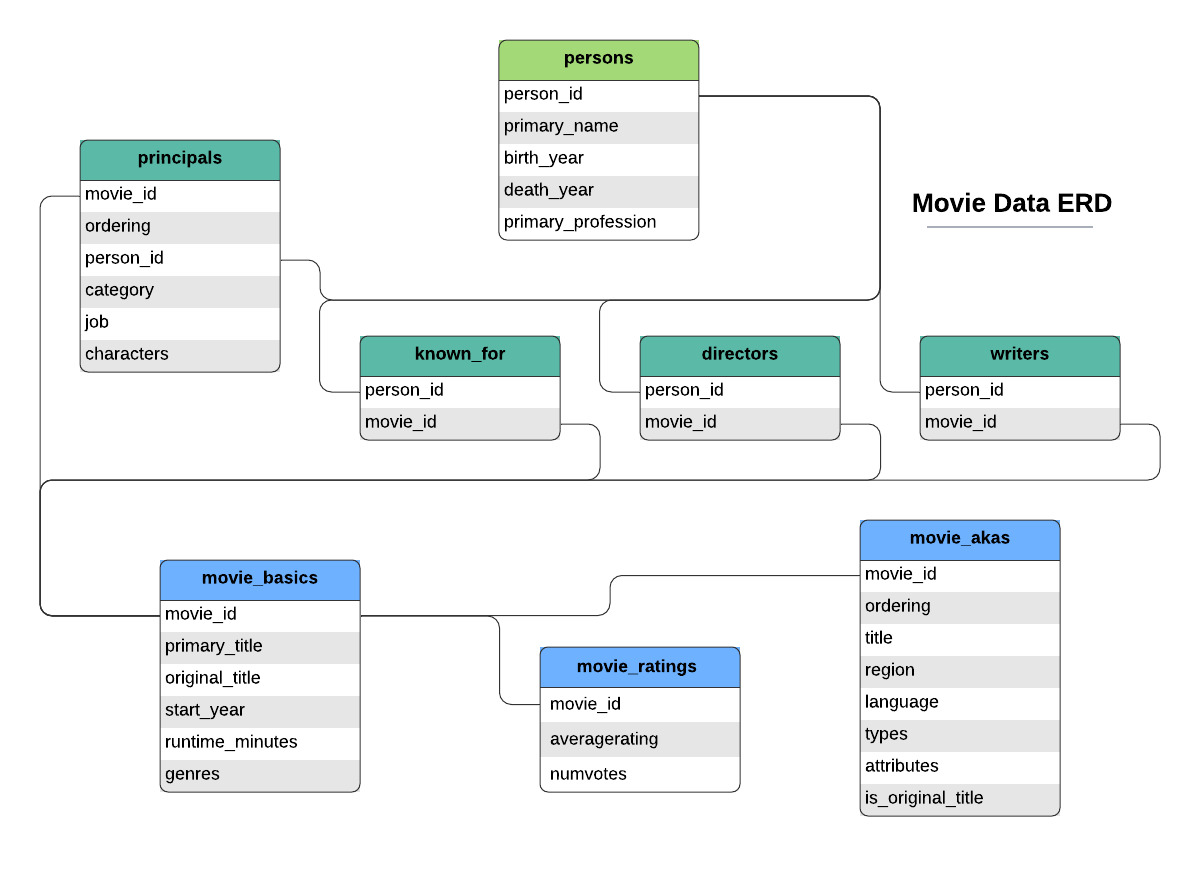


#### Read and Examine tables 

Use SQL

In [24]:
#Examine and identify datatypes for movie_basics table

movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [25]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [26]:
#Examine and identify datatypes for movie_ratings table

movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [27]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
# Examine and identify data types for movie_akas table

movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas;""", conn)

movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [29]:
movie_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [30]:
# Merge individual imdb dataframes into one dataframe using movie_id 

imdb_df = pd.merge(pd.merge(
    movie_basics_df, movie_ratings_df,on='movie_id'),
    movie_akas_df, on='movie_id').drop_duplicates(subset = 'movie_id')

imdb_df = imdb_df.reset_index(drop = True)

imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,1,One Day Before the Rainy Season,XWW,en,None,None,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,10,La otra cara del viento,VE,None,None,None,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,1,Subse Bada Sukh,IN,bn,None,None,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,1,La Telenovela Errante,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69572,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",8.1,7,1,Watching This Movie Is a Crime,XWW,en,imdbDisplay,None,0.0
69573,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5,1,Columbus,None,None,original,None,1.0
69574,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,1,BADMEN with a good behavior,DE,None,None,None,0.0
69575,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,1,Pengalila,None,None,original,None,1.0


#### Use Pandas

In [31]:
big_movie_df = pd.merge(bom_df, budgets_df, left_on='title', right_on='movie')

big_movie_df.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross'],
      dtype='object')

In [32]:
#drop column 'movie', keep 'title' as the primary key

big_movie_df.drop('movie', axis=1, inplace=True)

In [33]:
big_movie_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018","$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018","$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"


### Join or Merge Dataframes.
Join or merge the three dataframes from imdb, box office mojo, and production budgets into one dataframe for further analysis and data visualizations. 

In [34]:
super_df = pd.merge(big_movie_df, imdb_df, left_on='title', right_on='primary_title')

super_df.head()

,title_x,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,...,genres,averagerating,numvotes,ordering,title_y,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",...,"Adventure,Animation,Comedy",8.3,682218,10,Η ιστορία των παιχνιδιών 3,GR,None,None,None,0.0
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",...,"Action,Adventure,Sci-Fi",8.8,1841066,10,Începutul,RO,None,imdbDisplay,None,0.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",...,"Adventure,Animation,Comedy",6.3,167532,10,Shrek nüüd ja igavesti,EE,None,None,None,0.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",...,"Adventure,Drama,Fantasy",5.0,211733,10,The Twilight Saga: Eclipse,IT,None,imdbDisplay,None,0.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",...,"Action,Adventure,Sci-Fi",7.0,657690,10,Homem de Ferro 2,BR,None,None,None,0.0


In [35]:
#Identify datatypes

super_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            1398 non-null   object 
 1   studio             1398 non-null   object 
 2   domestic_gross_x   1397 non-null   float64
 3   foreign_gross      1202 non-null   object 
 4   year               1398 non-null   int64  
 5   id                 1398 non-null   int64  
 6   release_date       1398 non-null   object 
 7   production_budget  1398 non-null   object 
 8   domestic_gross_y   1398 non-null   object 
 9   worldwide_gross    1398 non-null   object 
 10  movie_id           1398 non-null   object 
 11  primary_title      1398 non-null   object 
 12  original_title     1398 non-null   object 
 13  start_year         1398 non-null   int64  
 14  runtime_minutes    1371 non-null   float64
 15  genres             1392 non-null   object 
 16  averagerating      1398 

In [36]:
#Identify missing data

super_df.isna().sum()

title_x                 0
studio                  0
domestic_gross_x        1
foreign_gross         196
year                    0
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes        27
genres                  6
averagerating           0
numvotes                0
ordering                0
title_y                 0
region                 99
language             1205
types                 465
attributes           1342
is_original_title       0
dtype: int64

##### Drop Columns
Examine overlapping data across columns. Identify which columns to drop based on datatype format, and missing data. 

In [37]:
# Drop following columns: 'id', 'ordering', 'language', 'types',
# 'attributes', 'is_original-title'
super_df.drop(['id', 'ordering', 'language', 'types', 
               'attributes', 'is_original_title'], axis=1)



,title_x,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_y,region
0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Η ιστορία των παιχνιδιών 3,GR
1,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Începutul,RO
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,Shrek nüüd ja igavesti,EE
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,The Twilight Saga: Eclipse,IT
4,Iron Man 2,Par.,312400000.0,311500000,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Homem de Ferro 2,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,Gotti,VE,4300000.0,NaN,2018,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",4.8,10358,Готи,BG
1394,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,"Feb 2, 2018","$30,000,000","$490,973","$648,599",tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,Bilal: A Lenda,PT
1395,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656",tt4995858,Mandy,Mandy,2016,113.0,"Drama,Thriller",4.1,39,Mandy,US
1396,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,Mandy,2018,121.0,"Action,Fantasy,Horror",6.6,44378,Mandy,DE
